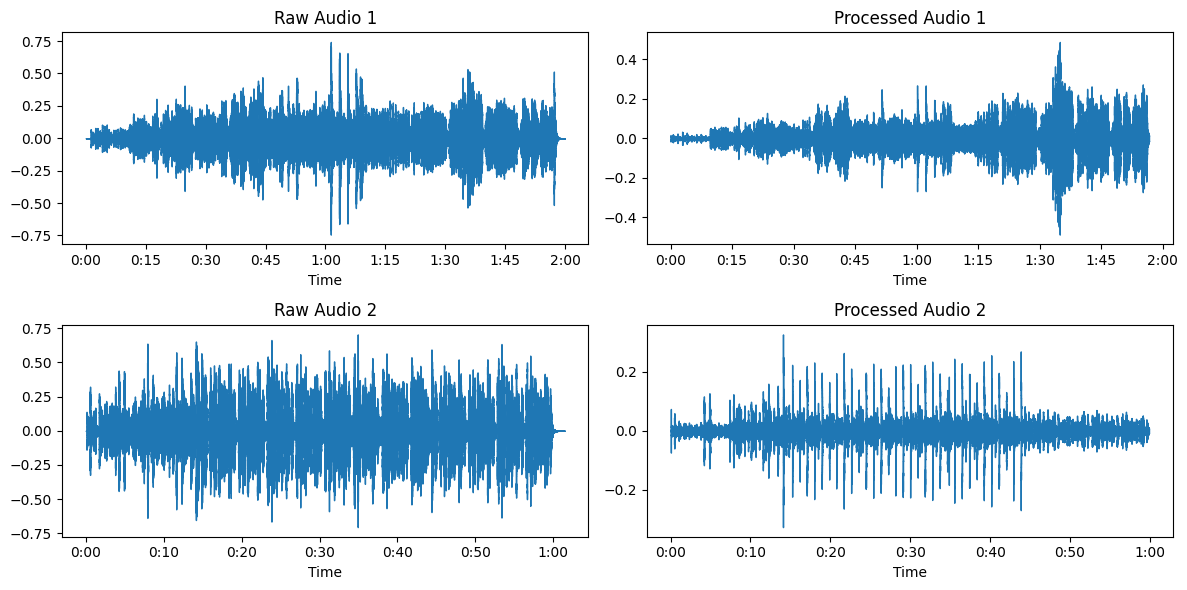

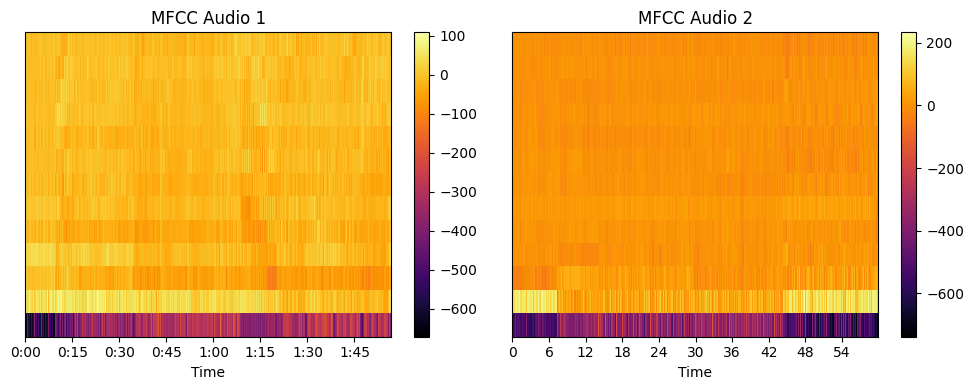

Features Tensor Shape: (2, 13, 1873)
Value Range: -738.1549 233.19766


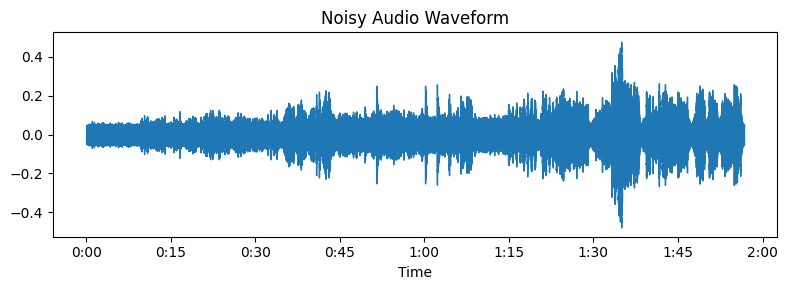

In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Configuration
TARGET_SR = 16000
N_MFCC = 13
TOP_DB = 25

# Utility Functions
def normalize_audio(y):
    """Peak normalization"""
    peak = np.max(np.abs(y))
    return y / peak if peak > 0 else y


def pre_emphasis(y, coeff=0.97):
    """High-frequency emphasis filter"""
    return np.append(y[0], y[1:] - coeff * y[:-1])


def trim_silence(y, sr, top_db=25):
    """Trim silence using librosa"""
    yt, _ = librosa.effects.trim(y, top_db=top_db)
    return yt


def preprocess_audio(y, sr):
    """Full preprocessing pipeline"""
    # Resample
    if sr != TARGET_SR:
        y = librosa.resample(y, orig_sr=sr, target_sr=TARGET_SR)

    # Normalize
    y = normalize_audio(y)

    # Trim silence
    y = trim_silence(y, TARGET_SR, TOP_DB)

    # Pre-emphasis
    y = pre_emphasis(y)

    return y


def extract_mfcc(y, sr):
    """MFCC extraction"""
    mfcc = librosa.feature.mfcc(
        y=y,
        sr=sr,
        n_mfcc=N_MFCC,
        n_fft=1024,
        hop_length=512
    )
    return mfcc

# Load Example Audio Files

audio_paths = [
    librosa.ex("nutcracker"),
    librosa.ex("vibeace")
]

raw_audios = []
processed_audios = []

for path in audio_paths:
    y, sr = librosa.load(path, sr=None)
    raw_audios.append((y, sr))
    processed_audios.append(preprocess_audio(y, sr))

# Visualization: Raw vs Processed
plt.figure(figsize=(12, 6))

for i, ((y_raw, sr_raw), y_proc) in enumerate(zip(raw_audios, processed_audios)):
    plt.subplot(2, 2, i * 2 + 1)
    librosa.display.waveshow(y_raw, sr=sr_raw)
    plt.title(f"Raw Audio {i+1}")

    plt.subplot(2, 2, i * 2 + 2)
    librosa.display.waveshow(y_proc, sr=TARGET_SR)
    plt.title(f"Processed Audio {i+1}")

plt.tight_layout()
plt.show()

# Feature Extraction (MFCCs)
mfcc_list = []

plt.figure(figsize=(10, 4))

for i, y in enumerate(processed_audios):
    mfcc = extract_mfcc(y, TARGET_SR)
    mfcc_list.append(mfcc)

    plt.subplot(1, 2, i + 1)
    librosa.display.specshow(
        mfcc,
        x_axis="time",
        sr=TARGET_SR,
        cmap="inferno"
    )
    plt.colorbar()
    plt.title(f"MFCC Audio {i+1}")

plt.tight_layout()
plt.show()

# Combine MFCCs into Tensor
min_frames = min(m.shape[1] for m in mfcc_list)
mfcc_list = [m[:, :min_frames] for m in mfcc_list]

features_tensor = np.stack(mfcc_list)

print("Features Tensor Shape:", features_tensor.shape)
print("Value Range:", features_tensor.min(), features_tensor.max())

# BONUS: Additive Noise Test
noise = np.random.normal(0, 0.015, len(processed_audios[0]))
noisy_audio = processed_audios[0] + noise

plt.figure(figsize=(8, 3))
librosa.display.waveshow(noisy_audio, sr=TARGET_SR)
plt.title("Noisy Audio Waveform")
plt.tight_layout()
plt.show()

In [4]:
!pip install numpy
!pip install matplotlib
!pip install librosa
!pip install soundfile


# To install a library, prepend '!' to the pip install command.
# For example, to install numpy, you would run:
# !pip install numpy

After running `!pip install numpy`, the `numpy` library will be available for use in your Colab environment. You can replace `numpy` with the name of any other library you wish to install.